
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn, urn_coll, calculate_midpoint, dist
import pandas as pd

Updated file `D:\documents\GitHub\newspapers_coll_conc\collocations.py`

In [2]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [3]:
movealpha = lambda x: list(tuple([x[-1]]) + tuple(x[:-1]))

In [4]:
def jaccards(s1, s2):
    return len(set(s1)&set(s2)),len(set(s1)|set(s2))

In [5]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [6]:
import pandas as pd

In [7]:
def make_dcoll_df(dists, norm, tot, exp=0):
    
    coll =  nb.frame(
        {
        'freq':dists['freq'].astype(int),
        'score':(dists.freq/dists.freq.sum())**exp*abs(norm/dists['2']), 
        'dist':dists['1'],
            'dist_' : dists['2'],
        'reference':(dists.freq/dists.freq.sum())/tot.tot
        }
    ).transpose()
    coll = coll.fillna(0)
    return coll.astype({'freq':'int32'})

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [8]:
tot = nb.frame(nb.totals(50000), 'tot')

In [9]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [10]:
smd = 5
lmd = 10
collword = 'kaffe'

In [11]:
def filenames(smd = smd, lmd = lmd, collword = collword, corpus_size= 1000, period = (1980, 2000)):
    return {
    'small_right': '_'.join([collword, str(smd), str(corpus_size), '-'.join([str(x) for x in period]), str(0), str(int(2*smd)), '.csv']),
    'large_right': '_'.join([collword, str(smd), str(corpus_size),  '-'.join([str(x) for x in period]), str(0), str(int(2*lmd)), '.csv']),
    'small_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*smd)), str(0), '.csv']),
    'large_left' : '_'.join([collword, str(lmd), str(corpus_size),  '-'.join([str(x) for x in period]), str(int(2*lmd)), str(0), '.csv'])
        }

# Store the data subsequent use

In [12]:
names = filenames()
names

{'small_right': 'kaffe_5_1000_1980-2000_0_10_.csv',
 'large_right': 'kaffe_5_1000_1980-2000_0_20_.csv',
 'small_left': 'kaffe_10_1000_1980-2000_10_0_.csv',
 'large_left': 'kaffe_10_1000_1980-2000_20_0_.csv'}

In [13]:
a1 = pd.read_csv(names['small_right'], index_col=0)
a2 = pd.read_csv(names['large_right'], index_col=0)
b1 = pd.read_csv(names['small_left'], index_col=0)
b2 = pd.read_csv(names['large_left'], index_col=0)


## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [14]:
coll = make_dcoll_df(a1, lmd, tot)

In [15]:
collb = make_dcoll_df(b1, lmd, tot)

## Sorting 

Sorting on the reference is by column 'nb'

In [16]:
coll[coll.freq > 10].sort_values(by='score', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
te,237,3.52113,2.83073,2.84,31.707
vafler,13,3.42466,2.70833,2.92,216.32
kaker,92,3.367,2.94098,2.97,255.776
termos,11,3.27869,2.80556,3.05,0
kakao,63,3.20513,3.08662,3.12,441.183
senga,13,3.20513,2.91667,3.12,15.2036
røkte,12,3.11526,3,3.21,58.61
olje,17,3.10559,3.07727,3.22,9.69598
smørbrød,26,3.07692,3.15741,3.25,147.56
eller,215,3.01205,3.31326,3.32,1.44512


In [17]:
coll.sort_values(by='reference', ascending=False)[:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
kakao,63,3.20513,3.08662,3.12,441.183
drikkes,22,1.60256,6.27778,6.24,301.237
bananer,33,2.73973,3.5963,3.65,299.242
koppene,19,2.0284,4.89881,4.93,262.334
kaker,92,3.367,2.94098,2.97,255.776
rundstykker,14,3.003,3.16667,3.33,248.224
vafler,13,3.42466,2.70833,2.92,216.32
konjakk,37,2.42718,4.08519,4.12,204.488
kannen,11,2.46914,3.9,4.05,198.144
Kaffen,10,2.22717,4.375,4.49,180.986


In [18]:
coll.loc[[',','.', 'og','eller', 'i', 'på','ned']]

,freq,score,dist,dist_,reference
",",3215,2.227171,4.493606,4.49,1.153050
.,3964,2.053388,4.865904,4.87,1.241492
og,2753,2.551020,3.919626,3.92,2.008213
eller,215,3.012048,3.313258,3.32,1.445120
i,980,1.886792,5.304478,5.30,0.844082
på,847,1.788909,5.585198,5.59,1.629991
ned,58,1.631321,6.143995,6.13,1.674834


# collb

In [19]:
collb.sort_values(by='reference', ascending=False)[:20].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
kopp,850,7.5188,-1.32574,-1.33,1119.41
kanne,58,5.61798,-1.70979,-1.78,581.517
skjenket,163,3.64964,-2.71856,-2.74,351.469
mineralvann,25,3.40136,-2.83333,-2.94,327.723
rykende,37,4.46429,-2.14993,-2.24,257.746
Viktigste,25,1.66667,-6.01587,-6,255.119
kakao,35,2.6738,-3.68642,-3.74,245.102
serverte,43,4.42478,-2.18148,-2.26,240.712
kopper,87,4.4843,-2.18757,-2.23,220.739
vafler,13,3.20513,-2.91667,-3.12,216.32


In [20]:
collb = collb.drop('kop')

In [21]:
collb[collb.freq > 20].sort_values(by='score', ascending=False)[:40].fillna(0).style.background_gradient()

,freq,score,dist,dist_,reference
kopp,850,7.5188,-1.32574,-1.33,1119.41
slurk,49,6.99301,-1.34286,-1.43,118.642
svart,107,6.80272,-1.42884,-1.47,32.0186
drakk,326,5.68182,-1.74805,-1.76,216.31
koke,67,5.64972,-1.71567,-1.77,120.784
kanne,58,5.61798,-1.70979,-1.78,581.517
kokt,21,5.40541,-1.66667,-1.85,36.7442
kokte,64,5.37634,-1.80331,-1.86,123.787
sterk,85,5.37634,-1.81906,-1.86,15.8174
drikke,215,4.90196,-2.02677,-2.04,102.011


In [47]:
collb[['freq','dist_', 'reference']].loc[[x for x in ['kakao', 'kaffe', 'te', 'sjokolade', 'latte', 'buljong'] if x in collb.index]]

,freq,dist_,reference
kakao,35,-3.74,245.101930
kaffe,157,-6.68,87.791997
te,120,-3.24,16.054192
sjokolade,19,-4.41,54.396609
buljong,1,-5.50,9.346958


In [23]:
common = coll.loc[[',','.', 'og','eller', 'i', 'på']]


In [24]:
common['translate'] = [',', '.', 'and', 'or', 'in', 'on']

common = common[movealpha(common.columns)]



In [25]:

common

,translate,freq,score,dist,dist_,reference
",",",",3215,2.227171,4.493606,4.49,1.153050
.,.,3964,2.053388,4.865904,4.87,1.241492
og,and,2753,2.551020,3.919626,3.92,2.008213
eller,or,215,3.012048,3.313258,3.32,1.445120
i,in,980,1.886792,5.304478,5.30,0.844082
på,on,847,1.788909,5.585198,5.59,1.629991


In [26]:
top10ratio = collb.sort_values(by='score', ascending=False)[:10]

In [27]:
top10ratio.index

Index(['nytraktet', 'nytrukket', 'kopp', 'Svart', 'nykokt', 'slurk', 'pund',
       'svart', 'Mer', 'nylaget'],
      dtype='object')

In [28]:
top10ratio['translate'] = ['freshly drawn', 'freshly drawn', 'cup', 'black', 'freshly boiled', 'sip', 'pound',
       'black', 'more', 'freshly made']

In [29]:
top10ratio  = top10ratio[movealpha(top10ratio.columns)]

In [45]:
top10ratio[['translate', 'freq', 'dist_', 'reference']].style.background_gradient()

,translate,freq,dist_,reference
nytraktet,freshly drawn,15,-1.3,0
nytrukket,freshly drawn,14,-1.32,0
kopp,cup,850,-1.33,1119.41
Svart,black,12,-1.38,59.5522
nykokt,freshly boiled,12,-1.38,0
slurk,sip,49,-1.43,118.642
pund,pound,13,-1.44,17.8394
svart,black,107,-1.47,32.0186
Mer,more,9,-1.5,6.77116
nylaget,freshly made,9,-1.5,0


In [31]:
top10ref = collb.sort_values(by='reference', ascending=False)[:10]

In [32]:
top10ref.index

Index(['kopp', 'kanne', 'skjenket', 'mineralvann', 'rykende', 'Viktigste',
       'kakao', 'serverte', 'kopper', 'vafler'],
      dtype='object')

In [33]:
top10ref['translate'] = ['cup', 'jug', 'poured', 'mineral water', 'smoking', 'main',
       'cocoa', 'served', 'cups', 'waffles']

In [34]:
top10ref  = top10ref[movealpha(top10ref.columns)]

In [46]:
top10ref[['translate', 'freq', 'dist_', 'reference']].style.background_gradient()

,translate,freq,dist_,reference
kopp,cup,850,-1.33,1119.41
kanne,jug,58,-1.78,581.517
skjenket,poured,163,-2.74,351.469
mineralvann,mineral water,25,-2.94,327.723
rykende,smoking,37,-2.24,257.746
Viktigste,main,25,-6,255.119
kakao,cocoa,35,-3.74,245.102
serverte,served,43,-2.26,240.712
kopper,cups,87,-2.23,220.739
vafler,waffles,13,-3.12,216.32


# coll

# jaccard similarity

compare over a range

In [51]:
rng = range(2,80,2)

# for collb

In [52]:
jaccard_scoresb = nb.frame({'ratio': {x:df_jaccard(collb[collb.freq > 10], 'reference', 'score', x) for x in rng}
                            }).transpose()

Text(0, 0.5, 'Jaccard score')

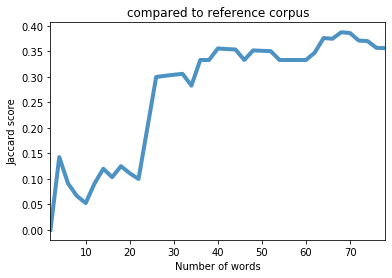

In [53]:
ax = jaccard_scoresb['ratio'].plot(title='compared to reference corpus', lw=4, alpha=0.8);
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

# for coll

In [39]:
jaccard_scores = nb.frame({'ratio': {x:df_jaccard(coll, 'score', 'reference', x) for x in rng}     }).transpose()

Text(0, 0.5, 'Jaccard score')

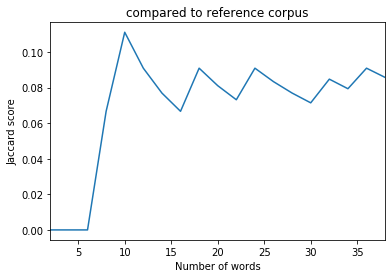

In [40]:
ax = jaccard_scores['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

In [41]:
coll.loc[coll[coll.score > 4].index].sort_values(by='score', ascending=False)

,freq,score,dist,dist_,reference
avec,9,6.25,1.111111,1.6,13.973378


In [42]:
coll.loc[coll[coll.reference> 30].index].sort_values(by='reference', ascending=False)

,freq,score,dist,dist_,reference
kakao,63,3.205128,3.086616,3.12,441.183475
drikkes,22,1.602564,6.277778,6.24,301.236739
bananer,33,2.739726,3.596296,3.65,299.241863
koppene,19,2.028398,4.898810,4.93,262.333714
kaker,92,3.367003,2.940984,2.97,255.775986
...,...,...,...,...,...
sigarer,2,2.222222,3.500000,4.50,30.292974
bryderi,2,1.333333,9.500000,7.50,30.238671
mmol,4,1.290323,8.500000,7.75,30.183413
Middag,5,2.070393,4.666667,4.83,30.127670


In [43]:
set(coll[coll.nb > 30].index) & set(coll[coll.score > 3.5].index)

AttributeError: 'DataFrame' object has no attribute 'nb'